In [1]:
pwd

'C:\\Users\\Deekshitha\\Desktop\\python'

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten
from keras.models import Model
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.layers import Dense,Flatten

In [4]:
datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
train_data= datagen.flow_from_directory('dataset/train',
                                            target_size = (224, 224),
                                            
                                            class_mode = 'categorical')

test_data = datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            
                                            class_mode = 'categorical')
val_data = datagen.flow_from_directory('dataset/val',
                                            target_size = (224, 224),
                                            
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 270 images belonging to 10 classes.


In [6]:
classes = ["Bulldog","Chihuahua","French Bulldog","German Shepherd","Golden Retriver","Labrador Retriver","Pomerianin","Poodle","Pug","Siberian Husky"]

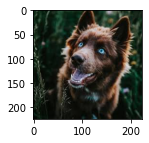

In [7]:

    plt.figure(figsize=(20,2))
    plt.imshow(train_data[0][0][0])
    

# ANN

In [8]:
model = keras.Sequential(
   [   keras.layers.Flatten(input_shape=(224,224,3)),
         keras.layers.Dense(2000,activation = "relu"),
     keras.layers.Dense(6000,activation = "relu"),
     keras.layers.Dense(4000,activation = "relu"),
    keras.layers.Dense(2000,activation = "relu"),
       keras.layers.Dense(10, activation = "sigmoid"),
    ]
)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 2000)              301058000 
                                                                 
 dense_1 (Dense)             (None, 6000)              12006000  
                                                                 
 dense_2 (Dense)             (None, 4000)              24004000  
                                                                 
 dense_3 (Dense)             (None, 2000)              8002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
Total params: 345,090,010
Trainable params: 345,090,010


# compile

In [10]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics='accuracy')

# fitting

In [11]:
model.fit_generator(train_data,epochs=5,validation_data=val_data)

<ipython-input-11-5a5299dfab6a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,epochs=5,validation_data=val_data)


Epoch 1/5
32/32 [==============================] - 75s 2s/step - loss: 67.7511 - accuracy: 0.1160 - val_loss: 2.4486 - val_accuracy: 0.1222
Epoch 2/5
32/32 [==============================] - 72s 2s/step - loss: 2.3506 - accuracy: 0.0970 - val_loss: 2.3022 - val_accuracy: 0.0407
Epoch 3/5
32/32 [==============================] - 72s 2s/step - loss: 2.3014 - accuracy: 0.0960 - val_loss: 2.2965 - val_accuracy: 0.1111
Epoch 4/5
32/32 [==============================] - 71s 2s/step - loss: 2.2949 - accuracy: 0.1090 - val_loss: 2.3047 - val_accuracy: 0.1148
Epoch 5/5
32/32 [==============================] - 70s 2s/step - loss: 2.3010 - accuracy: 0.1040 - val_loss: 2.3080 - val_accuracy: 0.1259


In [12]:
model.evaluate(test_data)

7/7 [==============================] - 3s 349ms/step - loss: 2.3442 - accuracy: 0.1050


[2.3441834449768066, 0.10499999672174454]